# PCA from Scratch

In this notebook, we will start with a toy example to illustarte how PCA works. Then, you will need to apply PCA in order to visualize points from a four-dimensional space on a 2D plot.

Run the cells of this notebook one-by-one, occasionally implementing some parts as instructed.

In [24]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# Toy example

In this section, we will consider a toy 2-dimensional dataset to illustrate how PCA helps reduce dimensionality of the data.

First, let's generate a dataset. Run the cell below to obtain a dataset with two features and $n$ examples:

In [25]:
def make_dataset(n=100):

  x1 = 2*np.random.rand(n) - 1
  x2 = x1 + 0.3*(2*np.random.rand(n) - 1)
  X = np.array([x1, x2]).T

  return X

X = make_dataset()
X.shape

(100, 2)

Run the following cell to visualize the data. Can you see what the direction of the maximal variance is?

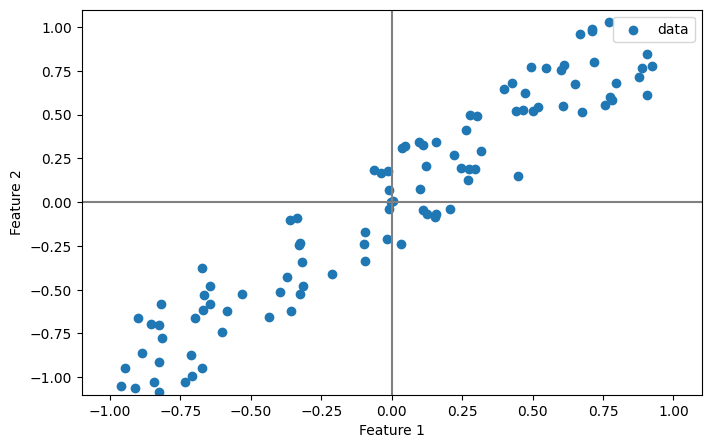

In [26]:
plt.figure(figsize=(8,5))

plt.scatter(X[:,0], X[:,1], label = 'data')

plt.axvline(x = 0, color = 'grey')
plt.axhline(y = 0, color = 'grey')


_ = plt.xlim((-1.1,1.1))
_ = plt.ylim((-1.1,1.1))

_ = plt.legend()
_ = plt.xlabel('Feature 1')
_ = plt.ylabel('Feature 2')

Let's perform PCA step by step.

First, Center the data by subtracting each feature's mean from their values.

In [27]:
# TODO: your code here
X_centered = X - np.mean(X,axis=0)
X_centered

array([[-8.48370298e-01, -1.03374175e+00],
       [ 1.19229432e-01, -7.33951380e-02],
       [ 2.99614116e-02, -2.48701723e-01],
       [ 7.06578484e-01,  9.72338543e-01],
       [ 3.94549355e-01,  6.40072545e-01],
       [-7.51806699e-03, -7.53074018e-03],
       [ 4.20950088e-01,  6.72208188e-01],
       [ 9.36109179e-01,  1.16134239e+00],
       [ 4.19358860e-02,  3.10737005e-01],
       [ 5.95058383e-01,  7.46742656e-01],
       [ 1.53533799e-01,  3.34162656e-01],
       [-3.19734171e-01, -4.84757803e-01],
       [ 2.18166245e-01,  2.60774972e-01],
       [ 1.48442787e-01, -9.44359097e-02],
       [ 4.37910900e-01,  5.11732156e-01],
       [ 9.00797415e-01,  6.06921556e-01],
       [-6.73868688e-02,  1.74313719e-01],
       [ 4.95750291e-01,  5.15496731e-01],
       [-6.48649042e-01, -5.89161633e-01],
       [ 2.58812560e-01,  4.05697981e-01],
       [-3.30088115e-01, -2.41961547e-01],
       [ 9.00900443e-01,  8.41225242e-01],
       [-8.20140273e-01, -7.84097741e-01],
       [-6.

Now, estimate the covariance matrix and find its eigenvectors and eigenvalues.

In [30]:
# TODO: your code here
cov = 1/(X.shape[0]-1)*X_centered.T@X_centered
cov

array([[0.31507128, 0.32388572],
       [0.32388572, 0.36536498]])

In [31]:
eigenvalues, eigenvectors = np.linalg.eigh(cov)
eigenvalues, eigenvectors

(array([0.01535766, 0.6650786 ]),
 array([[-0.73396463,  0.67918769],
        [ 0.67918769,  0.73396463]]))

What is the eigenvector corresponding to the largest eigenvalue? This is the first principle component of our data, and it shows the direction of the maximal variance in it.

In [32]:
# TODO: your code here
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvectors = eigenvectors[:,sorted_indices]
principal_component = sorted_eigenvectors[:,0]
principal_component

array([0.67918769, 0.73396463])

Let's project our two-dimensional data onto the first principle component to obtain a one-dimensional dataset.

In [22]:
# TODO: your code here
X_proj = X@principal_component
X_proj

array([-0.57537642, -1.33615332, -1.23246513, -0.69284518, -0.75657134,
        1.21966825,  1.16085832, -0.00842087,  0.94671737, -0.95374513,
       -1.13837884,  0.89983345, -1.25616204,  0.27874579, -0.1830543 ,
       -0.55844607,  0.19720562, -0.43763655,  0.52375098,  0.42697879,
       -0.09555842,  0.44672897,  1.01308606, -1.36331277, -0.03899066,
       -1.21375076,  0.71211041,  1.15232245, -1.1828169 , -0.77316939,
        0.7638481 ,  1.2026118 ,  1.41500895, -0.93286369, -0.52950098,
       -1.13737109, -0.29822471, -0.77733262, -1.0112712 ,  1.05352834,
       -0.99142742, -0.1630562 ,  1.2253009 ,  0.49247018, -0.55555537,
        0.85344135,  0.26513282, -1.18791915, -0.9180361 ,  0.1878282 ,
        1.17518551,  0.43683975,  1.01523869,  0.79506773,  1.11254736,
        0.56649363,  0.94842244, -0.15588237, -1.1392085 , -1.26049901,
       -0.24725299, -0.64973244,  1.11554168, -0.03777697, -0.77569804,
       -0.11022878, -0.95415571,  0.2253577 , -0.35447739,  0.21

Let's visualize the results! Add the line corresponding to the first principle component to the data plot above. Then, plot projections of the original data points onto this line.

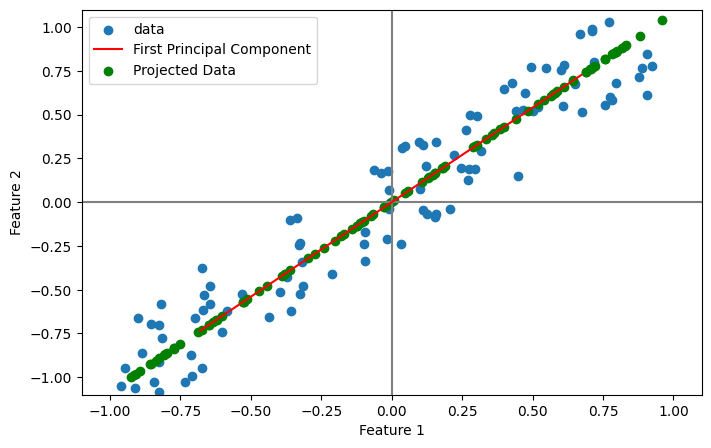

In [41]:
# TODO: your code here
kk = np.arange(-1,1,0.01)
pc_line = np.array([k * principal_component for k in kk])
data_proj = np.array([x * principal_component for x in X_proj])
plt.figure(figsize=(8,5))

plt.scatter(X[:,0], X[:,1], label = 'data')
plt.axvline(x = 0, color = 'grey')
plt.axhline(y = 0, color = 'grey')
plt.plot(pc_line[:,0],pc_line[:,1],label="First Principal Component",color="red")
plt.scatter(data_proj[:,0],data_proj[:,1],label="Projected Data",color="green")
_ = plt.xlim((-1.1,1.1))
_ = plt.ylim((-1.1,1.1))

_ = plt.legend()
_ = plt.xlabel('Feature 1')
_ = plt.ylabel('Feature 2')

Now, repeat the same thing, but this time use the function `make_dataset_2()` below to generate the dataset (go back to the first cell and uncomment the corresponding line).

# PCA on the Iris data

Now that we understand how PCA works on a toy example, we are ready to apply it to a real-world dataset.

In this exercise, you will work with the famous $\texttt{iris}$ dataset.

The data set consists of 50 samples from each of three species of Iris (setosa, virginica and versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

We will first load the data.

More information on the dataset? See [Wikipedia](https://en.wikipedia.org/wiki/Iris_flower_data_set).

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

# Columns of X represent examples
X = iris.data
y = iris.target

Each example in the dataset is a point in a four-dimensional space, which makes it impossible to plot the data.

In [ ]:
X.shape

Let's reduce the dimensionality of the data with the help of PCA.

## Implementing PCA

Iimplement the PCA procedure by completing the code below.

You can consult the slides from the lecture and / or practical session to review the PCA algorithm.

In [ ]:
def pca(X, n_components=2):

  # Center the data
  # (subtract each feature's mean from their values)

  # TODO: your code here

  # Estimate the covariance matrix

  # TODO: your code here

  # Find eigenvectors and eigenvalues
  # of the covariance matrix

  # TODO: your code here

  # Sort eigenvalues in the descending order
  # Don't forget to re-order the corresponding eigenvectors!

  # TODO: your code here

  # Select the first n_components eigenvectors (principle components)

  # TODO: your code here

  # Project the data onto the first n_components principle components

  # TODO: your code here

  return X_proj

Now, let's try our function out! Project the $\texttt{iris}$ data onto a 2D plane.

In [ ]:
X_proj = pca(X)

Now, visualize the projected data with a scatter plot! What can you say about the points corresponding to different iris types?

In [ ]:
for i, x in enumerate(X_proj):

  # Select color depending on the class
  # (iris type)

  if y[i] == 0:
    c = 'red'
  elif y[i] == 1:
    c = 'blue'
  else:
    c = 'black'

  # Plot the example

  plt.scatter(x[0], x[1], color=c)